In [22]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from singlecell.read import read_single_cell_sql
from singlecell.process import extract_single_cell_samples
from singlecell.visualize import visualize_n_SingleCell
from singlecell.preprocess.filter_out_edge_single_cells import edgeCellFilter
# from sklearn.cluster import KMeans
import time
plt.style.use(['science','no-latex'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
cd /home/ubuntu/workspace_SingleCell/SingleCell_Morphological_Analysis

/home/ubuntu/workspace_SingleCell/SingleCell_Morphological_Analysis


In [7]:
#These images have median values for target feature per class

paths={'SZ':'/home/ubuntu/bucket/projects/2016_08_01_RadialMitochondriaDistribution_donna/Mito_Morphology_input/images/171 Mito_Morphology/171 15_c2_ORG.tif',\
'Control':'/home/ubuntu/bucket/projects/2016_08_01_RadialMitochondriaDistribution_donna/Mito_Morphology_input/images/199 Mito_Morphology/199 19_c2_ORG.tif',\
'SZA':'/home/ubuntu/bucket/projects/2016_08_01_RadialMitochondriaDistribution_donna/Mito_Morphology_input/images/272 Mito_Morphology/272 16_c2_ORG.tif',\
'BP':'/home/ubuntu/bucket/projects/2016_08_01_RadialMitochondriaDistribution_donna/Mito_Morphology_input/images/70 Mito_Morphology/70 30_c2_ORG.tif',\
'MDD or Dep':'/home/ubuntu/bucket/projects/2016_08_01_RadialMitochondriaDistribution_donna/Mito_Morphology_input/images/72 Mito_Morphology/72 36_c2_ORG.tif'}

In [14]:
im_path.replace('_c2_',channels_map[channels[ci]])

'/home/ubuntu/bucket/projects/2016_08_01_RadialMitochondriaDistribution_donna/Mito_Morphology_input/images/72 Mito_Morphology/72 36_c2_ORG.tif'

<IPython.core.display.Javascript object>


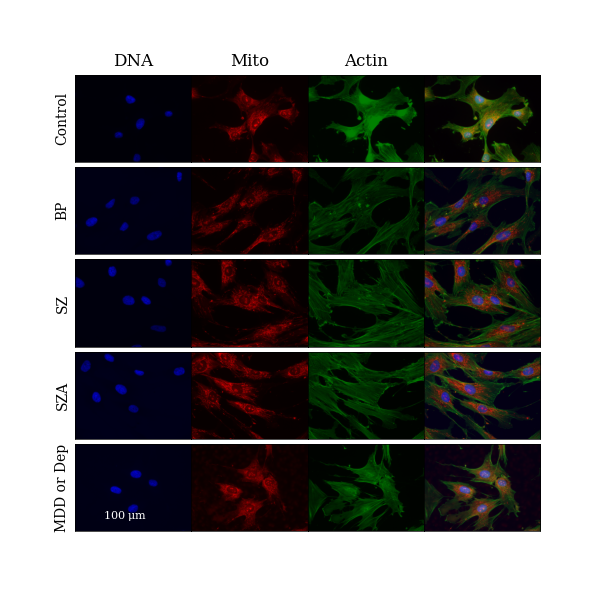

In [97]:
from skimage import exposure
from skimage.transform import resize
import skimage.io
import matplotlib.colors as mcolors
from matplotlib_scalebar.scalebar import ScaleBar

scalebar = ScaleBar(
    0.656,
    "um",
#     length_fraction=0.25,
    rotation="horizontal",
    scale_loc="right",
    border_pad=0.1,
    pad=0.5,
    color='w',
    box_color='k',
    location='lower left',
    box_alpha=0,
    fixed_value=100,
    font_properties={"size":8}
)

classes=['Control','BP', 'SZ', 'SZA', 'MDD or Dep']
channels=['DNA', 'Mito', 'Actin']

channels_map={'Actin':'_c2_','DNA':'_c1_','Mito':'_c3_'}
color=True
depth=255
f, axarr = plt.subplots(len(classes), len(channels)+1,figsize=(len(channels)*2,len(classes)*1.2));
# if len(title)>0:
# #         print(title)
#     f.suptitle(title);
channels_colormap= {'DNA':'Blue', 'ER':'Green', 'RNA':'Yellow', 'AGP':'Magenta', 'Mito':'Red',\
                   'DAPI':'Blue','Actin':'Green'}
channel_colors = [np.array(mcolors.to_rgb(channels_colormap[c]))*depth for c in channels]

comb_pars = [1/len(channels)]*len(channels)

    
f.subplots_adjust(hspace=0, wspace=0)
for index in range(len(classes)):         

    sc_collage_row=[]#np.zeros((boxSize,boxSize,columns_count))
    colorImagesList=[]
    for ci in range(len(channels)):
        if index==0:
            axarr[index,ci].set_title(channels[ci]);
            
        im_path=paths[classes[index]].replace('_c2_',channels_map[channels[ci]])
#             print(ch_pName+'/'+ch_fName)

        image_cropped=skimage.io.imread(im_path)
        image_cropped=(image_cropped/image_cropped.max())*depth
#         image_cropped = crop_single_cell_image(image,xCenter,yCenter,halfBoxSize)
#             print(image_cropped.shape,xCenter,yCenter)

        if 0:
            image_cropped= exposure.rescale_intensity(image_cropped,in_range=(image.min(),np.percentile(image, 99.95)))
        
        image_color=((skimage.color.gray2rgb(image_cropped).astype(float)/depth)*channel_colors[ci]).astype(np.uint8)
        colorImagesList.append(image_color)
        sc_collage_row.append(image_cropped)
#         print(image_color.max())
#         axarr[index,ci].imshow(image_cropped,cmap='gray',clim=(0, image_cropped.max()));
        axarr[index,ci].imshow(image_color)#,clim=(0, image_color.max()));
        axarr[index,ci].axes.xaxis.set_ticks([]);axarr[index,ci].axes.yaxis.set_ticks([])    
        axarr[index,0].set_ylabel(classes[index]);    

    if color:  
        colorImage0=sum([colorImagesList[i]*comb_pars[i] for i in range(len(colorImagesList))]).astype(np.uint8);
        colorImage0 = skimage.exposure.rescale_intensity(colorImage0,out_range=(0,depth)).astype(np.uint8)
        axarr[index,ci+1].imshow(colorImage0);
        axarr[index,ci+1].axes.xaxis.set_ticks([]);axarr[index,ci+1].axes.yaxis.set_ticks([])    

axarr[index,0].add_artist(scalebar);

In [92]:
# image_color
# skimage.color.gray2rgb(image_cropped).astype(float)
image_cropped.max()

255.0

In [81]:
image_cropped=skimage.io.imread(im_path)
image_cropped.max()

65520

In [66]:
# np.concatenate((a, b), axis=0)
# channel_colors[ci]
skimage.color.gray2rgb(image_cropped).max(),image_cropped.max()

(255, 255)

In [68]:
channel_colors[ci]

array([  0., 128.,   0.])

In [61]:
# image_cropped.max()
skimage.io.imread(im_path).shape

(1040, 1388)

In [67]:
(skimage.color.gray2rgb(image_cropped).astype(float)/depth).max()

1.0

In [65]:
image_cropped.max(),image_color.max()

(255, 42)

In [35]:
# image_color.min()
image_color.shape

(1040, 1388, 3)

In [31]:
comb_pars

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [36]:
channel_colors

[array([  0.,   0., 255.]),
 array([255.,   0., 255.]),
 array([  0., 128.,   0.])]